In [11]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [2]:
def plot_frame(frame):
    times = [i for i in range(1024)]

    plt.figure(figsize=(15, 10))

    for channel_id in range(128):
        plt.plot(times, frame[:, channel_id].flatten())

    plt.grid(True)
    plt.legend()
    plt.show()

In [3]:
FILE_NAME = 'EXP_17_all'

In [36]:
def load_exps(exps_paths):
    all_exps = []

    for exp_path in exps_paths:
        try:
            file = h5py.File(exp_path, 'r')
        except:
            print(f'Couldnt load exp {exp_path}')
            continue
        
        exp = file[f'Chn{8}'][128*5:-128*5]
        exp = np.split(exp, len(exp)/128)
        
        #exp = np.swapaxes(exp, 2, 1)

        #for chirp in exp:
        #    all_exps.append(chirp)

        all_exps = all_exps + list(exp)

        print(exp_path)

    all_exps = np.array(all_exps)
    all_exps[:, :, 0] = 0
    
    return np.array(all_exps).astype(np.float32)
        

In [37]:
raw_data = load_exps(glob('../../data/real/EXP_17_*.h5'))

../../data/real/EXP_17_S.h5
../../data/real/EXP_17_I.h5
../../data/real/EXP_17_J.h5
../../data/real/EXP_17_V.h5
../../data/real/EXP_17_H.h5
../../data/real/EXP_17_D.h5
../../data/real/EXP_17_R.h5
../../data/real/EXP_17_K.h5
../../data/real/EXP_17_C.h5
../../data/real/EXP_17_N.h5
../../data/real/EXP_17_A.h5
../../data/real/EXP_17_T.h5
../../data/real/EXP_17_F.h5
../../data/real/EXP_17_E.h5
../../data/real/EXP_17_B.h5
../../data/real/EXP_17_P.h5
../../data/real/EXP_17_L.h5
../../data/real/EXP_17_G.h5
../../data/real/EXP_17_O.h5
../../data/real/EXP_17_M.h5
../../data/real/EXP_17_Q.h5


In [38]:
raw_data.shape

(2308, 128, 1024)

In [39]:
np.save(f'../../data/preprocessed/{FILE_NAME}_framesone.npy', raw_data)

In [40]:
raw_data = np.swapaxes(raw_data, 2, 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


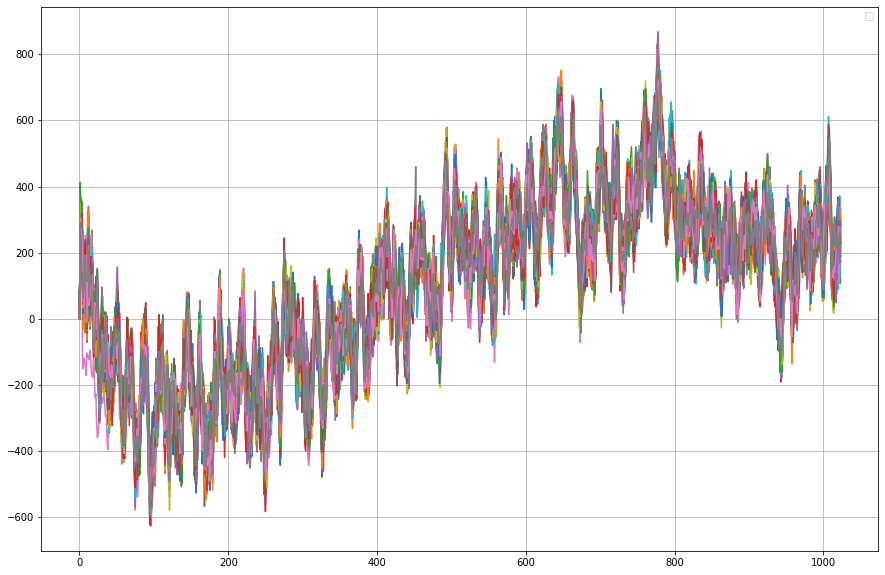

In [41]:
plot_frame(raw_data[51])

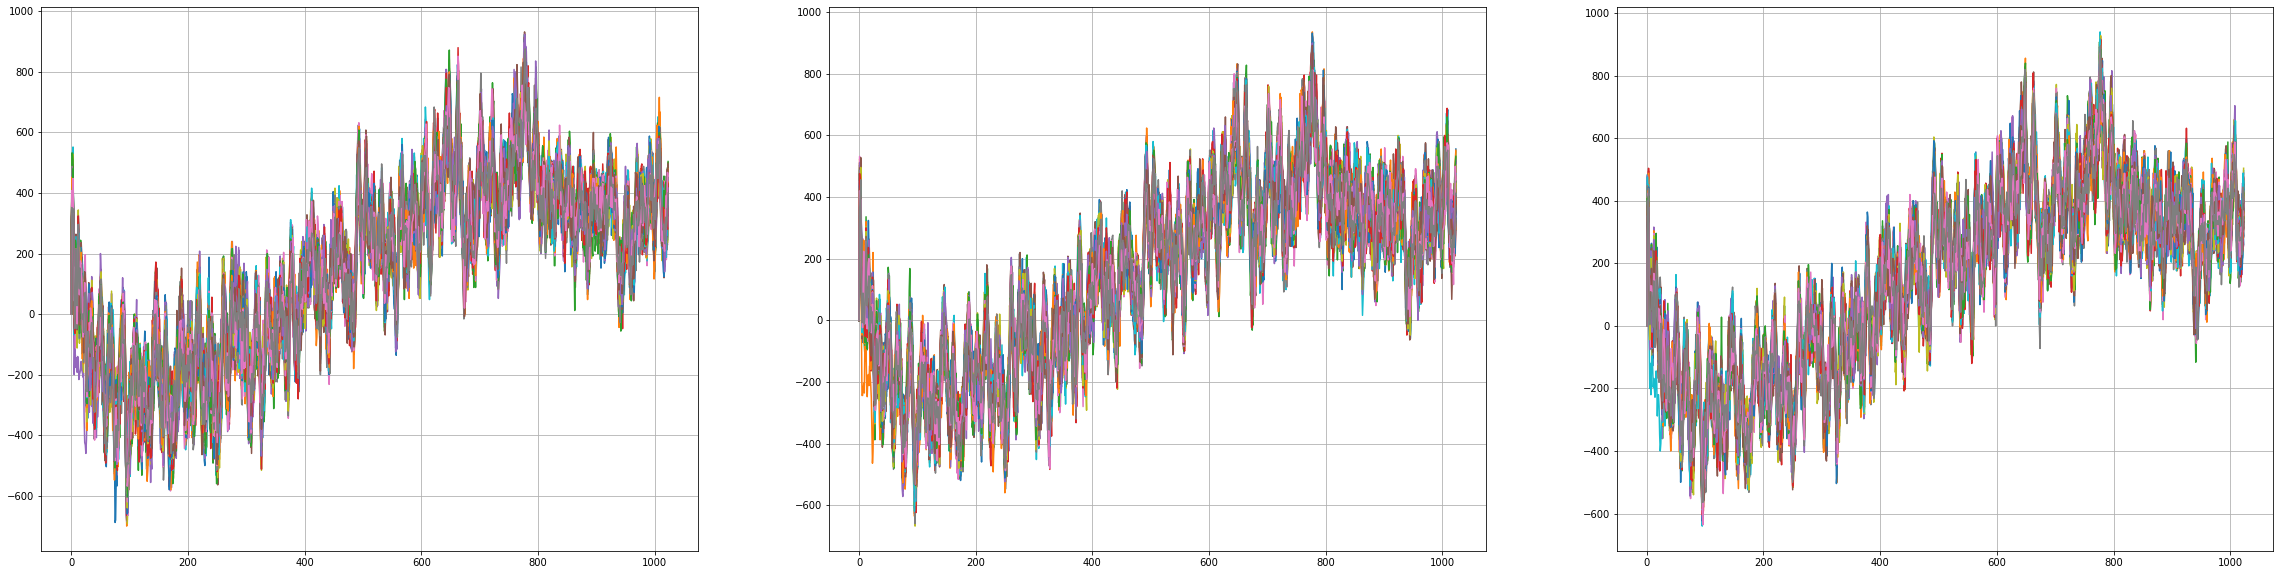

In [42]:
times = [i for i in range(1024)]

fig, axes = plt.subplots(1, 3, figsize=(40, 10))

for channel in range(128):
            axes[0].plot(times, raw_data[0, :, channel])
            axes[1].plot(times, raw_data[1, :, channel])
            axes[2].plot(times, raw_data[2, :, channel])

axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)

In [43]:
raw_data.shape

(2308, 1024, 128)

In [44]:
data_min = raw_data.min()
data_max = raw_data.max()

In [45]:
a, b = -1, 1

In [46]:
np.subtract(raw_data, data_min, out=raw_data)
np.multiply(raw_data, (b - a), out=raw_data)
np.divide(raw_data, (data_max - data_min), out=raw_data)
raw_data = np.add(raw_data, a, out=raw_data)

In [47]:
print(data_min, data_max)

-2868.0 2552.0


In [48]:
np.save(f'../../data/preprocessed/{FILE_NAME}_framesone_scaled.npy', raw_data)